### Imports

In [1]:
import sys
mypath = "/home/basia/Documents/spectroscopy/magnetstein"
sys.path.insert(0, mypath)

In [2]:
import numpy as np
import pandas as pd
import os
from masserstein import NMRSpectrum, estimate_proportions
import matplotlib.pyplot as plt
import pulp
import pickle

### Data

In [3]:
experiment_name = 'PMG 287 monitoring'

In [4]:
mixture_path = '../../data/PMG_287/PMG_287_seria1.csv'

mixture_separator = '\t'

whole_mixture_or_regions = 'regions'

if whole_mixture_or_regions == 'regions':
    data_path = '../../data/PMG_287/'
elif whole_mixture_or_regions == 'whole':
    data_path = '../../data/PMG_287_full_mixture_spectrum/'

#### Mixture in time

In [6]:
mixture_time_data = pd.read_csv(mixture_path, sep = mixture_separator).iloc[:,:-1]

In [7]:
names = ['ppm'] + ['t' + str(nb) for nb in range(1, mixture_time_data.shape[1])]

In [8]:
mixture_time_data.columns = names

In [9]:
mixture_time_data

,ppm,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t991,t992,t993,t994,t995,t996,t997,t998,t999,t1000
0,0.870309,-0.004947,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.870430,-0.004793,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.870552,-0.004716,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.870674,-0.004947,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.870795,-0.005285,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131067,16.813300,-0.004394,-0.006972,-0.008168,-0.009063,-0.009566,-0.010115,-0.010398,-0.010087,-0.010644,...,-0.012252,-0.012053,-0.011732,-0.011842,-0.011544,-0.011542,-0.011632,-0.012163,-0.011609,-0.012347
131068,16.813400,-0.004369,-0.007233,-0.008240,-0.009048,-0.009518,-0.010108,-0.010507,-0.009977,-0.010593,...,-0.012272,-0.012025,-0.011717,-0.011865,-0.011618,-0.011549,-0.011611,-0.012216,-0.011642,-0.012327
131069,16.813500,-0.004345,-0.007304,-0.008313,-0.009023,-0.009471,-0.010101,-0.010453,-0.010066,-0.010542,...,-0.012292,-0.012168,-0.011614,-0.012113,-0.011465,-0.011669,-0.011703,-0.012199,-0.011788,-0.012308
131070,16.813700,-0.004320,-0.007134,-0.008384,-0.008997,-0.009637,-0.009999,-0.010400,-0.010240,-0.010492,...,-0.012312,-0.012311,-0.011511,-0.012314,-0.011480,-0.011788,-0.011794,-0.012182,-0.011934,-0.012288


In [10]:
def load_spectrum(mixture_time_data, moment_of_time):
    ppm = mixture_time_data['ppm']
    intensity = mixture_time_data['t'+str(moment_of_time)]
    sp = NMRSpectrum(confs = list(zip(ppm, intensity)))
    return sp

In [11]:
%matplotlib notebook

<IPython.core.display.Javascript object>


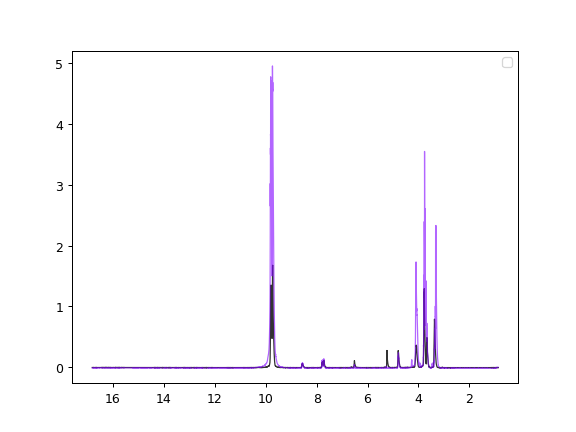

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [12]:
plt.gca().invert_xaxis()
NMRSpectrum.plot_all([load_spectrum(mixture_time_data, 1),
                     load_spectrum(mixture_time_data, 1000)], profile=True)

#### Reagents

In [13]:
# Integral(3.343730, 3.256018) product
# Integral(3.722376, 3.681636) product
# Integral(3.756886, 3.722376) product
# Integral(4.078496, 3.994139) product

# Integral(3.406997, 3.343730) silane
# Integral(3.832615, 3.756886) silane
# Integral(6.564104, 6.422073) silane

# Integral(3.679897, 3.599926) hexene
# Integral(4.129027, 4.079348) hexene
# Integral(4.857709, 4.668059) hexene
# Integral(7.838666, 7.616258) hexene
# Integral(8.647265, 8.440374) hexene

# Integral(10.387961, 2.952301) all

In [14]:
reagents_sp = []

mix_to_cut = pd.DataFrame(load_spectrum(mixture_time_data, 250).confs)

#baseline correction
#mix_to_cut.iloc[:,1] = mix_to_cut.iloc[:, 1] + 0.02

#hexene
reagent0 = mix_to_cut[mix_to_cut[0].apply(lambda x: (x>3.599926 and x<3.679897) or
                                                      (x>4.079348 and x<4.129027) or 
                                                      (x>4.668059 and x<4.857709) or 
                                                      (x>7.616258 and x<7.838666) or 
                                                      (x>8.440374 and x<8.647265)
                                         )
                     ]

ppm = reagent0.iloc[:,0]
ints = reagent0.iloc[:,1]
reagents_sp.append(NMRSpectrum(confs = list(zip(ppm, ints))))



#triethylsilane                           
reagent1 = mix_to_cut[mix_to_cut[0].apply(lambda x: (x>3.343730 and x<3.406997) or
                                                      (x>3.756886 and x<3.832615) or 
                                                      (x>6.422073 and x<6.564104)
                                         )
                     ]

ppm = reagent1.iloc[:,0]
ints = reagent1.iloc[:,1]
reagents_sp.append(NMRSpectrum(confs = list(zip(ppm, ints))))

#product                              
reagent2 = mix_to_cut[mix_to_cut[0].apply(lambda x: (x>3.256018 and x<3.343730) or
                                                      (x>3.681636 and x<3.722376) or 
                                                      (x>3.722376 and x<3.756886) or
                                                      (x>3.994139 and x<4.078496)
                                         )
                     ]

ppm = reagent2.iloc[:,0]
ints = reagent2.iloc[:,1]
reagents_sp.append(NMRSpectrum(confs = list(zip(ppm, ints))))

<IPython.core.display.Javascript object>


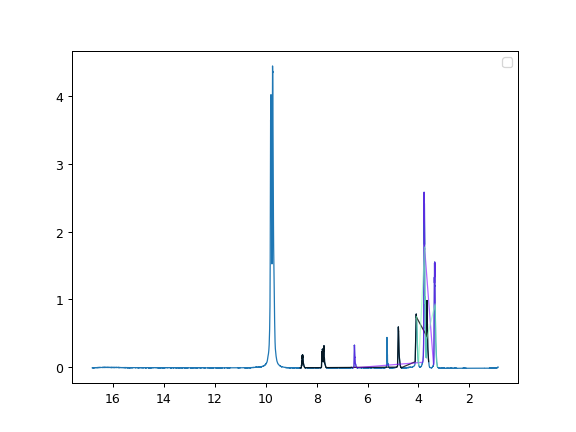

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [18]:
plt.gca().invert_xaxis()

load_spectrum(mixture_time_data, 250).plot(profile=True)
NMRSpectrum.plot_all(reagents_sp, profile=True)

#### Mixture

In [19]:
if whole_mixture_or_regions == 'whole':
    
    mixture_time_data = mixture_time_data[mixture_time_data.iloc[:,0].apply(lambda x: x>2.952301 and x<10.387961)]
    
elif whole_mixture_or_regions == 'regions':
    
    mixture_time_data = mixture_time_data[mixture_time_data.iloc[:,0].apply(lambda x:

                                                                (x>3.599926 and x<3.679897) or
                                                                (x>4.079348 and x<4.129027) or 
                                                                (x>4.668059 and x<4.857709) or 
                                                                (x>7.616258 and x<7.838666) or 
                                                                (x>8.440374 and x<8.647265) or

                                                                (x>3.343730 and x<3.406997) or
                                                                (x>3.756886 and x<3.832615) or 
                                                                (x>6.422073 and x<6.564104) or

                                                                (x>3.256018 and x<3.343730) or
                                                                (x>3.681636 and x<3.722376) or 
                                                                (x>3.722376 and x<3.756886) or
                                                                (x>3.994139 and x<4.078496)
                                                                           )
                                         ]

<IPython.core.display.Javascript object>


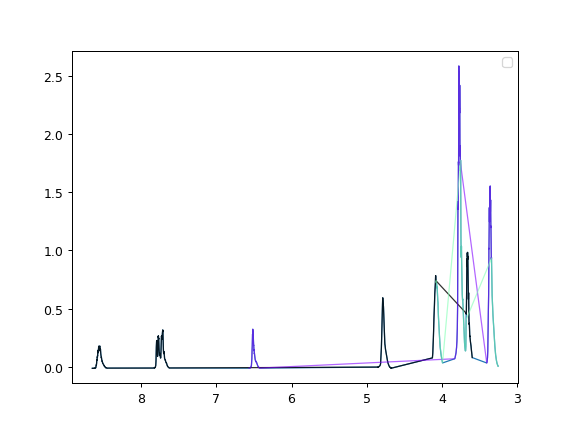

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [27]:
plt.gca().invert_xaxis()

load_spectrum(mixture_time_data, 250).plot(profile=True)
NMRSpectrum.plot_all(reagents_sp, profile=True)

### Saving preprocessed spectra

In [28]:
np.savetxt(data_path + 'preprocessed_hexene.csv', reagent0, delimiter = '\t')
np.savetxt(data_path + 'preprocessed_triethylsilane.csv', reagent1, delimiter = '\t')
np.savetxt(data_path + 'preprocessed_product.csv', reagent2, delimiter = '\t')

if whole_mixture_or_regions == 'whole':
    np.savetxt(data_path + 'preprocessed_mixture_whole.csv', mixture_time_data, delimiter = '\t')
    
elif whole_mixture_or_regions == 'regions':
    np.savetxt(data_path + 'preprocessed_mixture_cut_to_regions.csv', mixture_time_data, delimiter = '\t')